In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [3]:
os.chdir(r'/home/manhducnmd/pp_dijet/Results_full')

In [4]:
np.random.seed(42)

In [5]:
tf.random.set_seed(42)

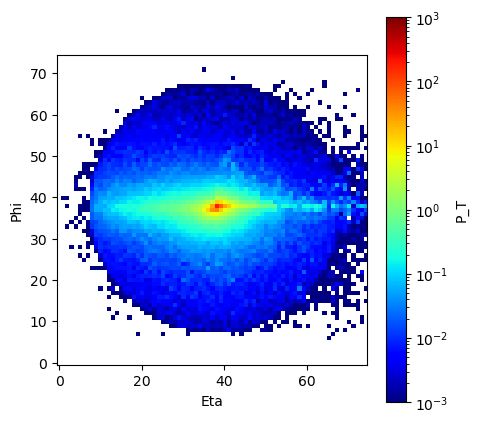

In [16]:
masked_data = np.ma.masked_equal(np.mean(bkg_sr_jet_1[0:10000], axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

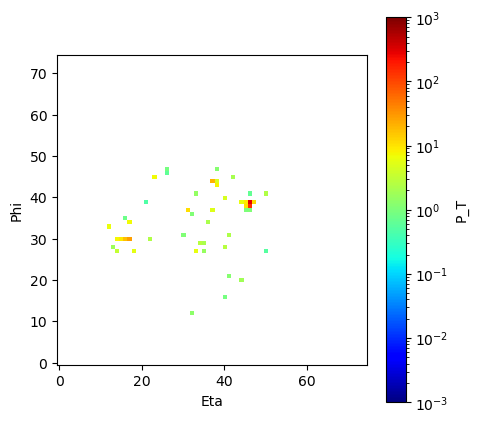

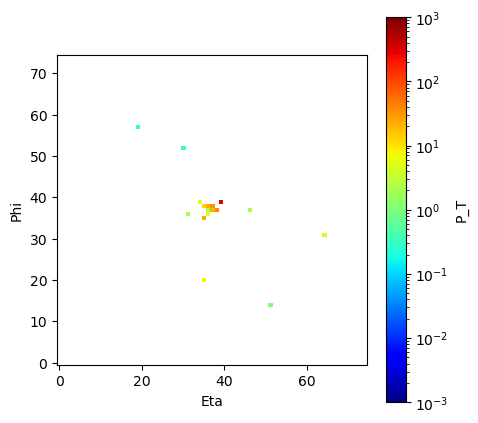

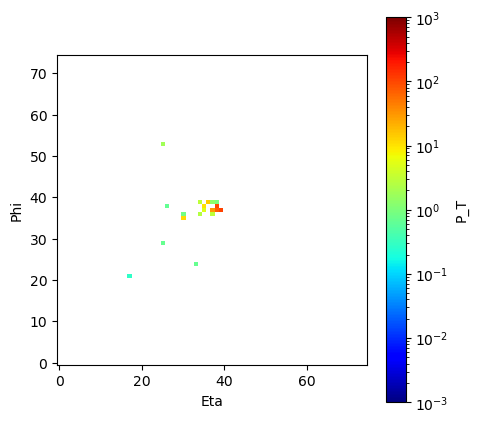

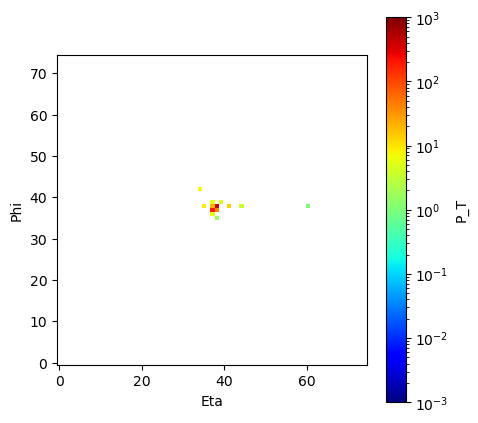

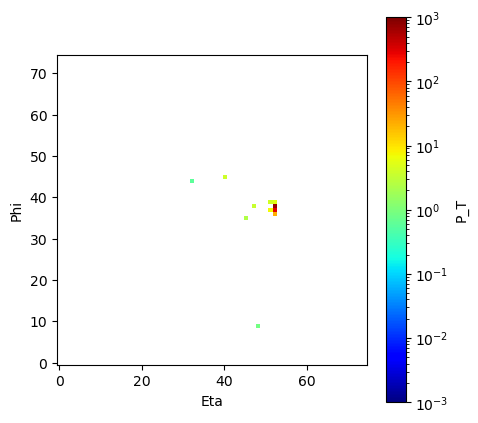

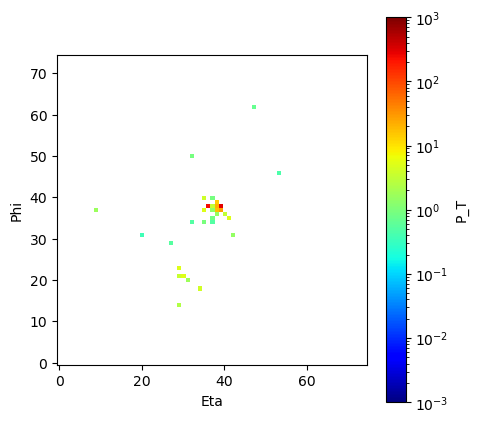

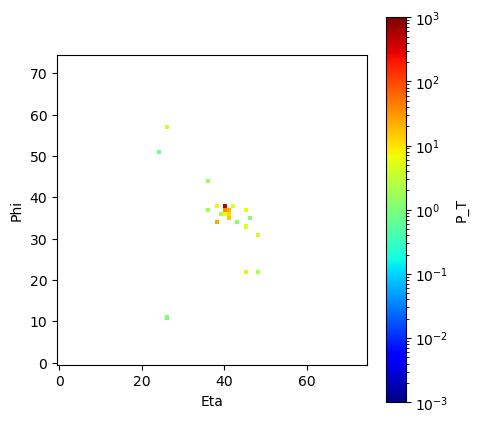

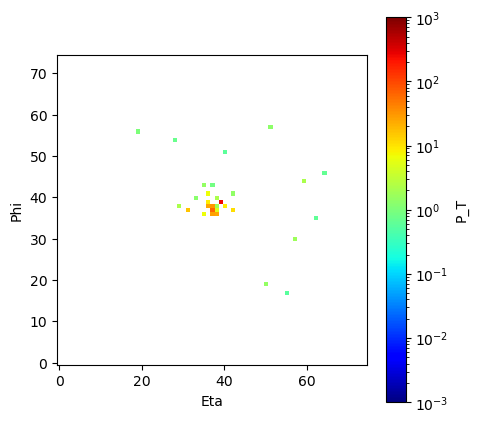

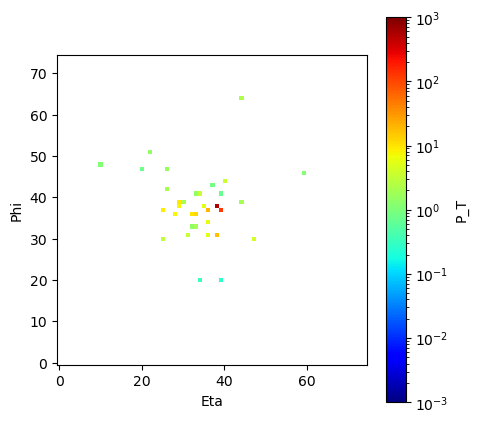

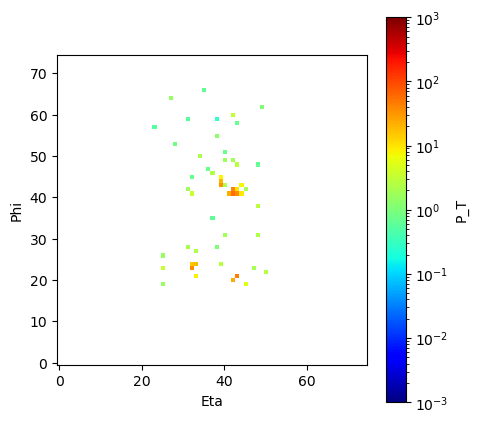

In [17]:
for k in range(0,10):  
    masked_data = np.ma.masked_equal(bkg_sr_jet_1[k], 0.)

    # Create a colormap based on 'jet'
    jet = plt.cm.jet

    # Create a custom colormap with white for masked values
    colors = jet(np.linspace(0, 1, 256))
    custom_cmap = mcolors.ListedColormap(colors)
    # Use a logarithmic norm, avoiding zero values
    norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

    # Plot using imshow with the custom colormap and logarithmic normalization
    plt.figure(figsize = (5,5))
    plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
    cbar = plt.colorbar()
    cbar.set_label("P_T")
    plt.xlabel("Eta")
    plt.ylabel("Phi")
    plt.gca().invert_yaxis()
    plt.show()

In [18]:
bkg_sb_jet_1 = np.load('background_images_sb_75_jet_1.npy')
bkg_sb_jet_2 = np.load('background_images_sb_75_jet_2.npy')

In [19]:
print(np.shape(bkg_sr_jet_1), np.shape(bkg_sr_jet_2), np.shape(bkg_sb_jet_1), 
      np.shape(bkg_sb_jet_2))

(62171, 75, 75) (62171, 75, 75) (64376, 75, 75) (64376, 75, 75)


In [20]:
sb_sr_bkg = np.shape(bkg_sb_jet_1)[0]/np.shape(bkg_sr_jet_2)[0]
print(sb_sr_bkg)

1.0354666966913835


In [46]:
n_train_sr_bkg = 20000
n_val_sr_bkg = 5000
n_train_sb_bkg = int(np.round(n_train_sr_bkg*sb_sr_bkg))
n_val_sb_bkg = int(np.round(n_val_sr_bkg*sb_sr_bkg))
print(n_train_sb_bkg, n_val_sb_bkg)
n_test_sr_bkg = 20000
#First jet, background, SR
bkg_train_sr_1 = bkg_sr_jet_1[0:n_train_sr_bkg]
bkg_val_sr_1 = bkg_sr_jet_1[n_train_sr_bkg:n_train_sr_bkg+n_val_sr_bkg]
bkg_test_1 = bkg_sr_jet_1[n_train_sr_bkg+n_val_sr_bkg:n_train_sr_bkg+n_val_sr_bkg+n_test_sr_bkg]
#Second jet, background, SR
bkg_train_sr_2 = bkg_sr_jet_2[0:n_train_sr_bkg]
bkg_val_sr_2 = bkg_sr_jet_2[n_train_sr_bkg:n_train_sr_bkg+n_val_sr_bkg]
bkg_test_2 = bkg_sr_jet_2[n_train_sr_bkg+n_val_sr_bkg:n_train_sr_bkg+n_val_sr_bkg+n_test_sr_bkg]
#First jet, background, SB
bkg_train_sb_1 = bkg_sb_jet_1[0:n_train_sb_bkg]
bkg_val_sb_1 = bkg_sb_jet_1[n_train_sb_bkg:n_train_sb_bkg+n_val_sb_bkg]
#Second jet, background, SB
bkg_train_sb_2 = bkg_sb_jet_2[0:n_train_sb_bkg]
bkg_val_sb_2 = bkg_sb_jet_2[n_train_sb_bkg:n_train_sb_bkg+n_val_sb_bkg]

print(np.shape(bkg_train_sr_1),np.shape(bkg_val_sr_1),np.shape(bkg_test_1), np.shape(bkg_train_sb_1), np.shape(bkg_val_sb_1))
print(np.shape(bkg_train_sr_2),np.shape(bkg_val_sr_2),np.shape(bkg_test_2), np.shape(bkg_train_sb_2), np.shape(bkg_val_sb_2)) 

20709 5177
(20000, 75, 75) (5000, 75, 75) (20000, 75, 75) (20709, 75, 75) (5177, 75, 75)
(20000, 75, 75) (5000, 75, 75) (20000, 75, 75) (20709, 75, 75) (5177, 75, 75)


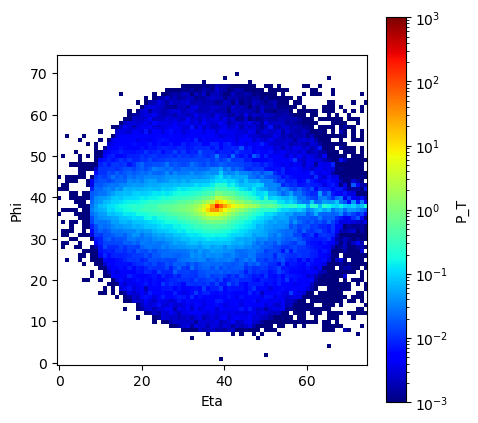

In [47]:
masked_data = np.ma.masked_equal(np.mean(bkg_test_1, axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

In [21]:
signal_sr_jet_1 = np.load('id10_sr_75_jet_1.npy')
signal_sr_jet_2 = np.load('id10_sr_75_jet_2.npy')

In [22]:
signal_sb_jet_1 = np.load('id10_sb_75_jet_1.npy')
signal_sb_jet_2 = np.load('id10_sb_75_jet_2.npy')

In [23]:
print(np.shape(signal_sr_jet_1), np.shape(signal_sr_jet_2), np.shape(signal_sb_jet_1), 
      np.shape(signal_sb_jet_2))

(45561, 75, 75) (45561, 75, 75) (14476, 75, 75) (14476, 75, 75)


In [24]:
sb_sr_signal = np.shape(signal_sb_jet_1)[0]/np.shape(signal_sr_jet_2)[0]
print(sb_sr_signal)

0.31772788130199076


In [97]:
sigma = 1
n_train_sr_signal = int(sigma*np.sqrt(n_train_sr_bkg + n_val_sr_bkg))
n_val_sr_signal = int(np.round(n_train_sr_signal/4))

n_train_sb_signal = int(np.round(n_train_sr_signal*sb_sr_signal))
n_val_sb_signal = int(np.round(n_val_sr_signal*sb_sr_signal))
print(n_train_sr_signal, n_val_sr_signal)
n_test_sr_signal = 20000

#First jet, signal, SR
signal_train_sr_1 = signal_sr_jet_1[0:n_train_sr_signal]
signal_val_sr_1 = signal_sr_jet_1[n_train_sr_signal:n_train_sr_signal+n_val_sr_signal]
signal_test_1 = signal_sr_jet_1[n_train_sr_signal+n_val_sr_signal:n_train_sr_signal+n_val_sr_signal+n_test_sr_signal]

#Second jet, signal, SR
signal_train_sr_2 = signal_sr_jet_2[0:n_train_sr_signal]
signal_val_sr_2 = signal_sr_jet_2[n_train_sr_signal:n_train_sr_signal+n_val_sr_signal]
signal_test_2 = signal_sr_jet_2[n_train_sr_signal+n_val_sr_signal:n_train_sr_signal+n_val_sr_signal+n_test_sr_signal]

#First jet, signal, SB
signal_train_sb_1 = signal_sb_jet_1[0:n_train_sb_signal]
signal_val_sb_1 = signal_sb_jet_1[n_train_sb_signal:n_train_sb_signal+n_val_sb_signal]

#Second jet, signal, SB
signal_train_sb_2 = signal_sb_jet_2[0:n_train_sb_signal]
signal_val_sb_2 = signal_sb_jet_2[n_train_sb_signal:n_train_sb_signal+n_val_sb_signal]

print(np.shape(signal_train_sr_1),np.shape(signal_val_sr_1),np.shape(signal_test_1), np.shape(signal_train_sb_1), np.shape(signal_val_sb_1))
print(np.shape(signal_train_sr_2),np.shape(signal_val_sr_2),np.shape(signal_test_2), np.shape(signal_train_sb_2), np.shape(signal_val_sb_2)) 

158 40
(158, 75, 75) (40, 75, 75) (20000, 75, 75) (50, 75, 75) (13, 75, 75)
(158, 75, 75) (40, 75, 75) (20000, 75, 75) (50, 75, 75) (13, 75, 75)


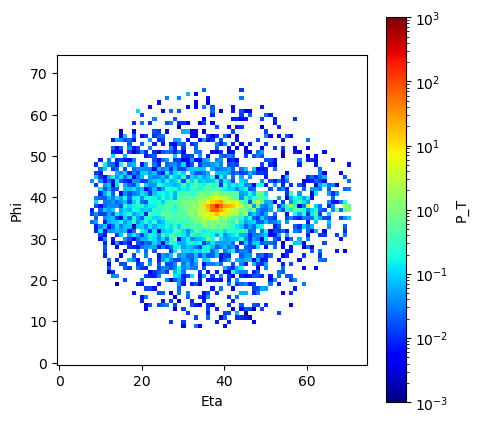

In [162]:
masked_data = np.ma.masked_equal(np.mean(signal_train_sr_1, axis = 0), 0.)

# Create a colormap based on 'jet'
jet = plt.cm.jet

# Create a custom colormap with white for masked values
colors = jet(np.linspace(0, 1, 256))
custom_cmap = mcolors.ListedColormap(colors)
# Use a logarithmic norm, avoiding zero values
norm = mcolors.LogNorm(vmin=10**-3, vmax=10**3)

# Plot using imshow with the custom colormap and logarithmic normalization
plt.figure(figsize = (5,5))
plt.imshow(masked_data, cmap=custom_cmap, norm=norm, interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label("P_T")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.gca().invert_yaxis()
plt.show()

In [163]:
train_sr_1 = np.concatenate((signal_train_sr_1, bkg_train_sr_1))
train_sr_2 = np.concatenate((signal_train_sr_2, bkg_train_sr_2))

train_label_sr = np.ones(np.shape(train_sr_1)[0])

In [100]:
train_sb_1 = np.concatenate((signal_train_sb_1, bkg_train_sb_1))
train_sb_2 = np.concatenate((signal_train_sb_2, bkg_train_sb_2))

train_label_sb = np.zeros(np.shape(train_sb_1)[0])

In [165]:
val_sr_1 = np.concatenate((signal_val_sr_1, bkg_val_sr_1))
val_sr_2 = np.concatenate((signal_val_sr_2, bkg_val_sr_2))

val_label_sr = np.ones(np.shape(val_sr_1)[0])

In [166]:
val_sb_1 = np.concatenate((signal_val_sb_1, bkg_val_sb_1))
val_sb_2 = np.concatenate((signal_val_sb_2, bkg_val_sb_2))

val_label_sb = np.zeros(np.shape(val_sb_1)[0])

In [103]:
test_label_signal = np.ones(np.shape(signal_test_1)[0])
test_label_bkg = np.zeros(np.shape(bkg_test_1)[0])

In [167]:
x_train_1 = np.concatenate((train_sr_1, train_sb_1))
x_train_2 = np.concatenate((train_sr_2, train_sb_2))
y_train = np.concatenate((train_label_sr, train_label_sb))

x_val_1 = np.concatenate((val_sr_1, val_sb_1))
x_val_2 = np.concatenate((val_sr_2, val_sb_2))
y_val = np.concatenate((val_label_sr, val_label_sb))

In [168]:
x_test_1 = np.concatenate((signal_test_1, bkg_test_1))
x_test_2 = np.concatenate((signal_test_2, bkg_test_2))
y_test = np.concatenate((test_label_signal, test_label_bkg))

In [170]:
def CWoLA():
    
    input_1 = keras.layers.Input(shape = (75,75,1), name = "jet_1")
    y = keras.layers.BatchNormalization()(input_1)
    input_2 = keras.layers.Input(shape = (75,75,1), name = "jet_2")
    z = keras.layers.BatchNormalization()(input_2)
    
    x = keras.layers.Concatenate(axis = 0)([y, z])

    x = keras.layers.Conv2D(64, (5,5), padding = 'same')(input_1)
    x = keras.layers.MaxPool2D(pool_size = (2,2))(x)
        
    x = keras.layers.Conv2D(64, (5, 5), padding='same')(x)
    x = keras.layers.MaxPool2D(pool_size = (2,2))(x)

    x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
    x = keras.layers.MaxPool2D(pool_size = (2,2))(x)
    
    x = keras.layers.Conv2D(128, (3,3))(x)
    x = keras.layers.Flatten()(x)
    
    x = keras.layers.Dense(128, activation = 'relu')(x)
    x = keras.layers.Dense(128, activation = 'relu')(x)
    x = keras.layers.Dense(128, activation = 'relu')(x)
    
    x = keras.layers.Dense(1, activation = 'sigmoid')(x)
    
    
    return keras.Model(         
    inputs=[input_1, input_2],
    outputs=x,)

In [171]:
x_train_1 = x_train_1.reshape((np.shape(x_train_1)[0], 75, 75, 1))
x_train_2 = x_train_2.reshape((np.shape(x_train_2)[0], 75, 75, 1))
x_val_1 = x_val_1.reshape((np.shape(x_val_1)[0], 75, 75, 1))
x_val_2 = x_val_2.reshape((np.shape(x_val_2)[0], 75, 75, 1))

In [172]:
cwola = CWoLA()
loss_object = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
cwola.compile(loss = loss_object, optimizer = optimizer, metrics = ['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=30, restore_best_weights=True)

In [133]:
cwola.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
jet_1 (InputLayer)              [(None, 75, 75, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 75, 75, 64)   1664        jet_1[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_33 (MaxPooling2D) (None, 37, 37, 64)   0           conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 37, 37, 64)   102464      max_pooling2d_33[0][0]           
___________________________________________________________________________________________

In [28]:
#x_train_1 = keras.layers.BatchNormalization()(x_train_1)
#x_train_1 = keras.layers.BatchNormalization()(x_train_1)
#x_val_1 = keras.layers.BatchNormalization()(x_val_1)
#x_val_2 = keras.layers.BatchNormalization()(x_val_2)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



2024-07-02 17:15:25.933486: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [173]:
print(np.shape(y_train))

(40917,)


In [174]:
print(np.shape(x_val_1))

(10230, 75, 75, 1)


In [175]:
cwola.fit({'jet_1': x_train_1, 'jet_2': x_train_2}, y_train,
          validation_data=({'jet_1': x_val_1, 'jet_2': x_val_2}, y_val), 
          shuffle = True, batch_size = 500, callbacks = [early_stopping], epochs = 1000)




Train on 40917 samples, validate on 10230 samples
Epoch 1/1000
40917/40917 [==============================] - 8s 197us/sample - loss: 0.7001 - accuracy: 0.5013 - val_loss: 0.6938 - val_accuracy: 0.5038
Epoch 2/1000
40917/40917 [==============================] - 7s 180us/sample - loss: 0.6928 - accuracy: 0.5171 - val_loss: 0.6947 - val_accuracy: 0.5106
Epoch 3/1000
40917/40917 [==============================] - 7s 179us/sample - loss: 0.6930 - accuracy: 0.5158 - val_loss: 0.6965 - val_accuracy: 0.5076
Epoch 4/1000
40917/40917 [==============================] - 7s 178us/sample - loss: 0.6941 - accuracy: 0.5083 - val_loss: 0.6940 - val_accuracy: 0.5091
Epoch 5/1000
40917/40917 [==============================] - 7s 180us/sample - loss: 0.6919 - accuracy: 0.5187 - val_loss: 0.6959 - val_accuracy: 0.5072
Epoch 6/1000
40917/40917 [==============================] - 7s 179us/sample - loss: 0.6909 - accuracy: 0.5218 - val_loss: 0.6960 - val_accuracy: 0.4968
Epoch 7/1000
40917/40917 [============

In [137]:
x_test_1 = x_test_1.reshape((np.shape(x_test_1)[0],75,75,1))
x_test_2 = x_test_2.reshape((np.shape(x_test_2)[0],75,75,1))

In [138]:
x_predict = cwola.predict([x_test_1, x_test_2])

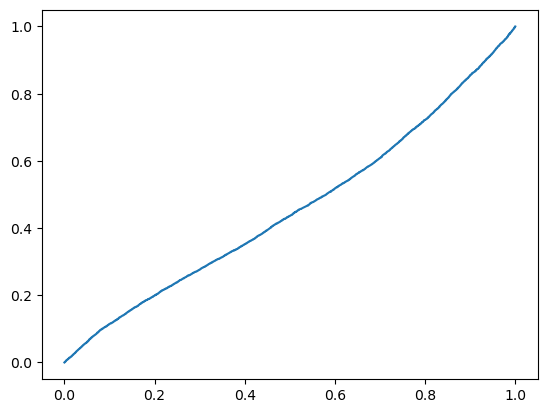

[0.0009 0.013  0.1147]


In [141]:
from sklearn.metrics import roc_curve
from scipy import interpolate
fpr, tpr, th = roc_curve(y_test, x_predict)
f = interpolate.interp1d(fpr, tpr)
epsilon_s = f([0.001, 0.01, 0.1])
plt.plot(fpr, tpr)
plt.show()
print(epsilon_s)